In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import torch
from rdkit import Chem

In [3]:
train_smiles = torch.load("./data/geom_drug/train_smiles.pt")

In [4]:
mols = [Chem.MolFromSmiles(s) for s in train_smiles]

In [5]:
smiles_canonical = [Chem.MolToSmiles(m) for m in mols]
smiles_set = set(smiles_canonical)
len(smiles_set)

230819

<BarContainer object of 52 artists>

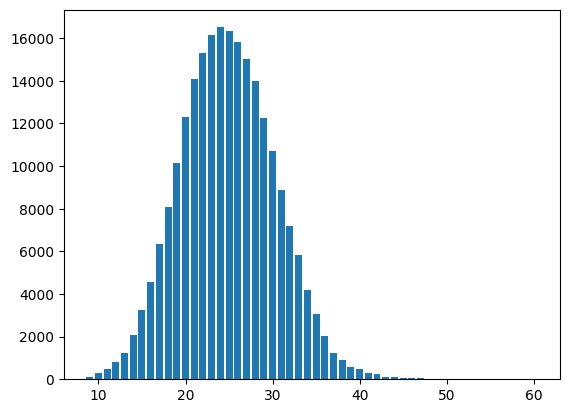

In [7]:
sizes = np.array([len(m.GetAtoms()) for m in mols])
min_size, max_size = sizes.min(), sizes.max()
bins = np.bincount(sizes)
plt.bar(range(min_size, max_size + 1), bins[min_size : max_size + 1])

In [4]:
penicillin_core_mol = Chem.MolFromSmarts("O=C1CC2N1CCS2")
lactam_patt = Chem.MolFromSmarts("O=C1NCC1")
thio_ring_patt = Chem.MolFromSmarts("[#6]1[#16][#6][#6][#6]1")

In [5]:
has_penicillin_core = [m.HasSubstructMatch(penicillin_core_mol) for m in mols]
has_lactam = [m.HasSubstructMatch(lactam_patt) for m in mols]
has_thio_ring = [m.HasSubstructMatch(thio_ring_patt) for m in mols]

In [7]:
sum(has_penicillin_core), sum(has_lactam), sum(has_thio_ring)

(59, 269, 18061)

In [14]:
269 / len(mols)

0.0011618716067086207